In [79]:
!pip install scikit-multilearn==0.2.0

In [80]:


import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import hamming_loss, accuracy_score, confusion_matrix, multilabel_confusion_matrix

from transformers import AutoTokenizer



import pandas as pd
import numpy as np


df_l1= pd.read_csv('/content/train_en_l1.csv')
df_l1







,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN


In [81]:


df_l1_test= pd.read_csv('/content/test_en_l1.csv')
df_l1_test



,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"""who's this tweet about"" bitch it's about you ...",question_1,NaN,0.0,NaN,NaN,0.0,1.0
1,#AlkaLamba should’ve used her slippers to slap...,question_1,0.0,0.0,NaN,0.0,NaN,NaN
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_1,NaN,NaN,1.0,NaN,1.0,1.0
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_1,NaN,1.0,1.0,NaN,1.0,NaN
4,***Let us celebrate “secular” as a beautiful w...,question_1,NaN,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_1,0.0,NaN,1.0,NaN,NaN,1.0
1103,“The limits of tyrants are prescribed by the e...,question_1,0.0,NaN,0.0,NaN,0.0,NaN
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_1,NaN,NaN,0.0,NaN,0.0,1.0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_1,NaN,NaN,1.0,NaN,1.0,1.0


In [82]:
df_l3= pd.read_csv('/content/train_en_l3.csv')
df_l3

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_3,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_3,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_3,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_3,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_3,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_3,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_3,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_3,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_3,0.0,1.0,1.0,0.0,NaN,NaN


In [83]:
df_l3_test= pd.read_csv('/content/test_en_l3.csv')
df_l3_test


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"""who's this tweet about"" bitch it's about you ...",question_3,NaN,0.0,NaN,NaN,0.0,1.0
1,#AlkaLamba should’ve used her slippers to slap...,question_3,0.0,0.0,NaN,0.0,NaN,NaN
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_3,NaN,NaN,1.0,NaN,1.0,1.0
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_3,NaN,1.0,1.0,NaN,1.0,NaN
4,***Let us celebrate “secular” as a beautiful w...,question_3,NaN,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_3,0.0,NaN,1.0,NaN,NaN,1.0
1103,“The limits of tyrants are prescribed by the e...,question_3,0.0,NaN,0.0,NaN,0.0,NaN
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_3,NaN,NaN,0.0,NaN,0.0,1.0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_3,NaN,NaN,1.0,NaN,1.0,1.0


In [ ]:
annotation_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5','en_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  




In [85]:
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label, axis=1)
df_l1


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0,0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN,1
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN,1


In [86]:
df_l1_test['label_1'] = df_l1_test[annotation_cols].apply(get_majority_label, axis=1)
df_l1_test


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1
0,"""who's this tweet about"" bitch it's about you ...",question_1,NaN,0.0,NaN,NaN,0.0,1.0,0
1,#AlkaLamba should’ve used her slippers to slap...,question_1,0.0,0.0,NaN,0.0,NaN,NaN,0
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_1,NaN,NaN,1.0,NaN,1.0,1.0,1
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_1,NaN,1.0,1.0,NaN,1.0,NaN,1
4,***Let us celebrate “secular” as a beautiful w...,question_1,NaN,0.0,1.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_1,0.0,NaN,1.0,NaN,NaN,1.0,1
1103,“The limits of tyrants are prescribed by the e...,question_1,0.0,NaN,0.0,NaN,0.0,NaN,0
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_1,NaN,NaN,0.0,NaN,0.0,1.0,0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_1,NaN,NaN,1.0,NaN,1.0,1.0,1


In [ ]:
df_l3['label_3'] = df_l3[annotation_cols].apply(get_majority_label, axis=1)
df_l3


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_3
0,"This is our history . For Shia and Sunni ,...",question_3,NaN,NaN,NaN,NaN,NaN,0.0,0
1,"If this is ""grilling"" then wht wud u call t...",question_3,NaN,NaN,NaN,1.0,NaN,NaN,1
2,look at <handle replaced>madam. Locals attac...,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
3,our beloved yogi ji has given money home and...,question_3,NaN,NaN,NaN,NaN,1.0,NaN,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_3,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_3,0.0,1.0,1.0,0.0,NaN,NaN,1


In [88]:
df_l3_test['label_3'] = df_l3_test[annotation_cols].apply(get_majority_label, axis=1)
df_l3_test

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_3
0,"""who's this tweet about"" bitch it's about you ...",question_3,NaN,0.0,NaN,NaN,0.0,1.0,0
1,#AlkaLamba should’ve used her slippers to slap...,question_3,0.0,0.0,NaN,0.0,NaN,NaN,0
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_3,NaN,NaN,1.0,NaN,1.0,1.0,1
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_3,NaN,1.0,1.0,NaN,1.0,NaN,1
4,***Let us celebrate “secular” as a beautiful w...,question_3,NaN,0.0,1.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_3,0.0,NaN,1.0,NaN,NaN,1.0,1
1103,“The limits of tyrants are prescribed by the e...,question_3,0.0,NaN,0.0,NaN,0.0,NaN,0
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_3,NaN,NaN,0.0,NaN,0.0,1.0,0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_3,NaN,NaN,1.0,NaN,1.0,1.0,1


In [ ]:
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],
    'label_3': df_l3['label_3']
})

df = df.dropna(subset=['label_1', 'label_3'])

df['label_1'] = df['label_1'].astype(int)
df['label_3'] = df['label_3'].astype(int)

# Preview
print(df.head())
print(df.shape)

                                                text  label_1  label_3
0      This is our history . For Shia and Sunni ,...        0        0
1     If this is "grilling" then wht wud u call t...        1        1
2    look at <handle replaced>madam. Locals attac...        0        0
3    our beloved yogi ji has given money home and...        1        1
4  "I gonna kill that bitch"  Bitvj imma kill you...        1        1
(6531, 3)


In [ ]:
df_test = pd.DataFrame({
    'text': df_l1_test['text'],
    'label_1': df_l1_test['label_1'],
    'label_3': df_l3_test['label_3']
})

df_test = df_test.dropna(subset=['label_1', 'label_3'])

df_test['label_1'] = df_test['label_1'].astype(int)
df_test['label_3'] = df_test['label_3'].astype(int)

print(df_test.head())
print(df_test.shape)

                                                text  label_1  label_3
0  "who's this tweet about" bitch it's about you ...        0        0
1  #AlkaLamba should’ve used her slippers to slap...        0        0
2  #CoronaVillains  #COVIDIDIOT   #COVID2019 is a...        1        1
3  (Acts 29:19994) LIKE the female "governors" of...        1        1
4  ***Let us celebrate “secular” as a beautiful w...        0        0
(1107, 3)


In [91]:
df.head(85)

,text,label_1,label_3
0,"This is our history . For Shia and Sunni ,...",0,0
1,"If this is ""grilling"" then wht wud u call t...",1,1
2,look at <handle replaced>madam. Locals attac...,0,0
3,our beloved yogi ji has given money home and...,1,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1,1
...,...,...,...
80,<handle replaced> I come from a normal family ...,0,0
81,<handle replaced> Jai hind. We support CAA. ...,0,1
82,<handle replaced> Just saw few clips of u figh...,1,1
83,<handle replaced> Just saw few clips of ur big...,0,0


In [ ]:
import re
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)          
    text = re.sub(r'<.*?>', '', text)                          
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[@#][\w.-]+', '[USER]', text)  

    return text

In [93]:
df['text'] = df['text'].apply(normalize_text)
df


,text,label_1,label_3
0,"this is our history . for shia and sunni , don...",0,0
1,"if this is ""grilling"" then wht wud u call th s...",1,1
2,look at madam. locals attacked. no religion an...,0,0
3,our beloved yogi ji has given money home and f...,1,1
4,"""i gonna kill that bitch"" bitvj imma kill you ...",1,1
...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,0,0
6527,😂😂😂😂 i was by myself and it was her and her bi...,0,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch im c...,0,0
6529,"😎""boys only luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",1,1


In [97]:


df_test['text'] = df_test['text'].apply(normalize_text)
df_test




,text,label_1,label_3
0,"""who's this tweet about"" bitch it's about you ...",0,0
1,[user] should’ve used her slippers to slap tha...,0,0
2,[user] [user] [user] is a [user] don't spread ...,1,1
3,"(acts 29:19994) like the female ""governors"" of...",1,1
4,***let us celebrate “secular” as a beautiful w...,0,0
...,...,...,...
1102,you should be tired of not having any kind of ...,1,1
1103,“the limits of tyrants are prescribed by the e...,0,0
1104,♋️🦀 like wtf my symbol is 69 and i’m a crab an...,0,0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",1,1


In [ ]:
from sklearn.model_selection import train_test_split

df['label_combo'] = df['label_1'].astype(str) + '_' + df['label_3'].astype(str)

train_df, val_df = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['label_combo']
)

train_df = train_df.drop(columns='label_combo')
val_df = val_df.drop(columns='label_combo')

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")


Train size: 5551
Validation size: 980


In [99]:
train_df.head(100)

,text,label_1,label_3
1614,this propaganda won't work this time ... every...,0,1
5113,ji wish you very happy birthday 🎂🎉 lord shiva ...,0,0
2596,getting mental strength from your [USER] album...,0,0
5050,hey happy b day have fun enjoy my sis boy 1 week,0,0
750,so [USER] is the biggest concern for you? does...,0,0
...,...,...,...
5950,my post office manager 🤣🤣 stupid bitch,1,1
3150,it's u only baby,0,0
3122,it fell down just like democracy. simple. 🙅,0,1
6511,y’all bitches be weird fr,1,1


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt


def load_embeddings(embedding_path, max_vocab_size):
    embeddings_index = {}

    dim = None
    with open(embedding_path, 'r', encoding='utf-8') as f:
        first_line = f.readline().split()
        try:
            n_words, dim = map(int, first_line)
            if max_vocab_size:
                n_words = min(n_words, max_vocab_size)
        except ValueError:
            dim = len(first_line) - 1
            f.seek(0)  
            n_words = sum(1 for _ in f)
            if max_vocab_size:
                n_words = min(n_words, max_vocab_size)

    embedding_matrix = np.zeros((n_words + 1, dim)) 
    word_index = {}

    with open(embedding_path, 'r', encoding='utf-8') as f:
        for idx, line in enumerate(f):
            if max_vocab_size and idx >= max_vocab_size:
                break

            values = line.rstrip().split()
            if len(values) != dim + 1:
                continue

            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')

            word_index[word] = idx + 1  
            embedding_matrix[idx + 1] = vector

    return word_index, embedding_matrix
# Dataset class
class engMultiTaskDataset(Dataset):
    def __init__(self, df, word_index, max_len=128):
        self.texts = df['text'].apply(normalize_text).tolist()
        self.label1 = df['label_1'].astype(float).tolist()
        self.label3 = df['label_3'].astype(float).tolist()
        self.word_index = word_index
        self.max_len = max_len
        self.unk_token = 0  


    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        if idx >= len(self):
            raise IndexError(f"Index {idx} out of range for dataset size {len(self)}")

        tokens = self.texts[idx].split()[:self.max_len]
        sequence = [self.word_index.get(word, self.unk_token) for word in tokens]

        # Pad/truncate
        if len(sequence) < self.max_len:
            sequence = sequence + [0] * (self.max_len - len(sequence))
        else:
            sequence = sequence[:self.max_len]

        return {
            'input_ids': torch.tensor(sequence, dtype=torch.long),
            'label_1': torch.tensor(self.label1[idx], dtype=torch.float),
            'label_3': torch.tensor(self.label3[idx], dtype=torch.float)
        }



import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class engBiLSTMCNN(nn.Module):
    def __init__(self, embedding_matrix, lstm_units=128, cnn_filters=100):
        super().__init__()

        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix),
            padding_idx=0,
            freeze=False
        )

        self.bilstm = nn.LSTM(
            input_size=embedding_matrix.shape[1],
            hidden_size=lstm_units,
            bidirectional=True,
            batch_first=True,
            num_layers=1,  
            dropout=0.1


        )

        self.conv3 =  nn.Sequential(
            nn.Conv1d(2*lstm_units, cnn_filters, 3, padding=1),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv1d(2*lstm_units, cnn_filters, 5, padding=2),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU())
        self.classifier = nn.Linear(2*cnn_filters, 2)  

    def forward(self, x):
        # x shape: [batch_size, seq_len]
        x = self.embedding(x)  

        x, _ = self.bilstm(x)  
        x = x.permute(0, 2, 1)  

        c3 = torch.relu(self.conv3(x)).max(dim=2)[0] 
        c5 = torch.relu(self.conv5(x)).max(dim=2)[0]

        features = torch.cat([c3, c5], dim=1)
        return torch.sigmoid(self.classifier(features))  

def train_model(model, train_loader,val_loader, epochs=10,lr = 0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)  # L2 reg
    loss_fn = nn.BCELoss()

    train_losses, val_losses = [], []
    best_val_loss = float('inf')

    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0
        for batch in train_loader:
            inputs = batch['input_ids'].to(device)
            labels = torch.stack([batch['label_1'], batch['label_3']], dim=1).to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                inputs = batch['input_ids'].to(device)
                labels = torch.stack([batch['label_1'], batch['label_3']], dim=1).to(device)
                outputs = model(inputs)
                epoch_val_loss += loss_fn(outputs, labels).item()

        avg_train_loss = epoch_train_loss/len(train_loader)
        avg_val_loss = epoch_val_loss/len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model_eng.pt')

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show


In [ ]:
from sklearn.metrics import f1_score

def evaluate_model(model, data_loader, device='cuda'):
    model.eval()
    y_true_1 = []
    y_pred_1 = []
    y_true_3 = []
    y_pred_3 = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)

            label_1 = batch['label_1'].to(device)
            label_3 = batch['label_3'].to(device)

            outputs = model(input_ids)
            pred_1 = (outputs[:, 0] > 0.5).int().cpu().numpy()  
            pred_3 = (outputs[:, 1] > 0.5).int().cpu().numpy()  

            y_true_1.extend(label_1.cpu().numpy())
            y_pred_1.extend(pred_1)
            y_true_3.extend(label_3.cpu().numpy())
            y_pred_3.extend(pred_3)

    f1_1 = f1_score(y_true_1, y_pred_1, average='macro')
    f1_3 = f1_score(y_true_3, y_pred_3, average='macro')

    print(f"Macro F1-score for Label 1 (gendered abuse): {f1_1:.4f}")
    print(f"Macro F1-score for Label 3 (explicit content): {f1_3:.4f}")
    return f1_1, f1_3



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


Epoch 1/8 | Train Loss: 0.6052 | Val Loss: 0.6338
Epoch 2/8 | Train Loss: 0.5247 | Val Loss: 0.5738
Epoch 3/8 | Train Loss: 0.5289 | Val Loss: 0.6123
Epoch 4/8 | Train Loss: 0.5273 | Val Loss: 0.5369
Epoch 5/8 | Train Loss: 0.5246 | Val Loss: 0.5247
Epoch 6/8 | Train Loss: 0.5177 | Val Loss: 0.5375
Epoch 7/8 | Train Loss: 0.5189 | Val Loss: 0.5282
Epoch 8/8 | Train Loss: 0.5174 | Val Loss: 0.5259

Validation Results:
Macro F1-score for Label 1 (gendered abuse): 0.5815
Macro F1-score for Label 3 (explicit content): 0.6051

Test Results:
Macro F1-score for Label 1 (gendered abuse): 0.5726
Macro F1-score for Label 3 (explicit content): 0.6367


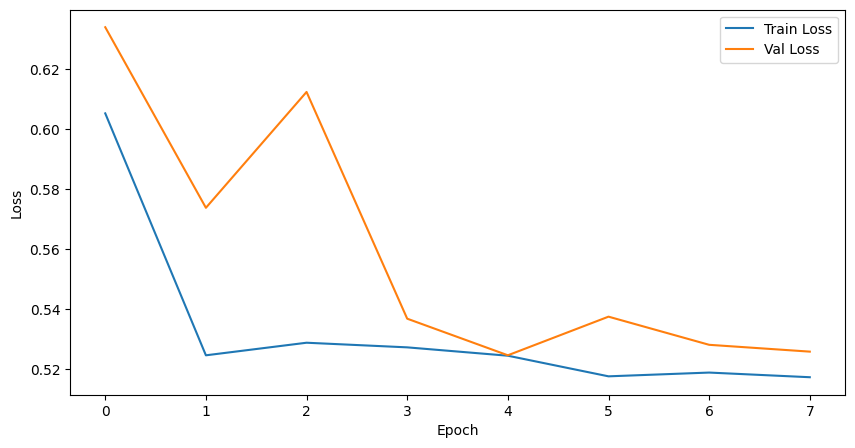

In [ ]:
if __name__ == "__main__":
    word_index, embedding_matrix = load_embeddings('/content/glove.6B.300d.txt',max_vocab_size=250000)
    model = engBiLSTMCNN(embedding_matrix)

    train_dataset = engMultiTaskDataset(train_df, word_index)
    val_dataset = engMultiTaskDataset(val_df, word_index)
    test_dataset = engMultiTaskDataset(df_test, word_index)


    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128)
    test_loader = DataLoader(test_dataset, batch_size=128)

    train_model(model, train_loader, val_loader, epochs=8)

    print("\nValidation Results:")
    evaluate_model(model, val_loader)

    print("\nTest Results:")
    evaluate_model(model, test_loader)